### Importing Libraries

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Load Preprocessed Data

In [18]:
df_preprocessed = pd.read_csv("../data/processed_heart_disease.csv")

print("Preprocessed DataFrame shape:", df_preprocessed.shape)
print("\nFirst few rows:")
print(df_preprocessed.head())
print("\nDataframe info:")
print(df_preprocessed.info())
print("\nTarget value counts:")
print(df_preprocessed["target"].value_counts())

x = df_preprocessed.drop('target', axis=1)
y = df_preprocessed['target']

print(f"\nFeatures (X) shape: {x.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFirst few rows of features (X):")
print(x.head())
print("\nFirst few values of target (y):")
print(y.head())

Preprocessed DataFrame shape: (920, 14)

First few rows:
    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0    1   1     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0    1   4     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0    1   4     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0    1   3     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0    0   2     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    int64  
 2   cp        920 non-null 

### Apply PCA

In [19]:
pca_full = PCA()

pca_full.fit(x)

explained_variance_ratio = pca_full.explained_variance_ratio_
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")
    
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("\nCumulative Explained Variance Ratio:")
for i, cum_ratio in enumerate(cumulative_variance_ratio):
    print(f"PC{i+1}: {cum_ratio:.4f}")

Explained Variance Ratio for each component:
PC1: 0.9205
PC2: 0.0482
PC3: 0.0253
PC4: 0.0056
PC5: 0.0002
PC6: 0.0001
PC7: 0.0001
PC8: 0.0000
PC9: 0.0000
PC10: 0.0000
PC11: 0.0000
PC12: 0.0000
PC13: 0.0000

Cumulative Explained Variance Ratio:
PC1: 0.9205
PC2: 0.9686
PC3: 0.9939
PC4: 0.9995
PC5: 0.9997
PC6: 0.9998
PC7: 0.9999
PC8: 0.9999
PC9: 1.0000
PC10: 1.0000
PC11: 1.0000
PC12: 1.0000
PC13: 1.0000


### Determining Optimal Number of Components


Number of components to retain 95.0% variance: 2
Number of components to retain 99.0% variance: 3


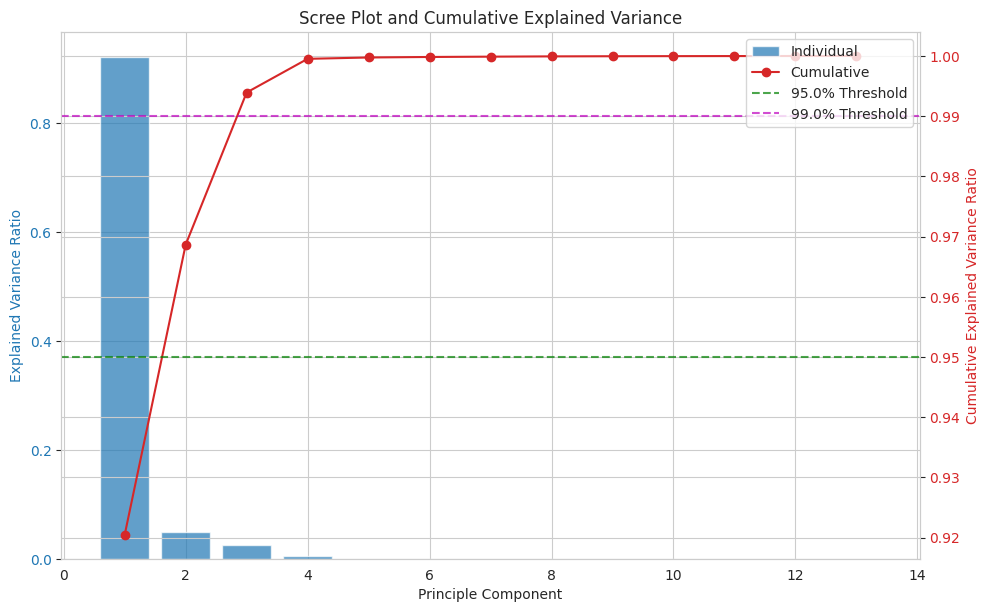


Chosen number of components: 2


In [20]:
threshold_95 = 0.95
threshold_99 = 0.99

n_components_95 = np.argmax(cumulative_variance_ratio >= threshold_95) + 1
n_components_99 = np.argmax(cumulative_variance_ratio >= threshold_99) + 1

print(f"\nNumber of components to retain {threshold_95*100}% variance: {n_components_95}")
print(f"Number of components to retain {threshold_99*100}% variance: {n_components_99}")

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel("Principle Component")
ax1.set_ylabel("Explained Variance Ratio", color=color)
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color=color, alpha=0.7, label='Individual')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Explained Variance Ratio', color=color)
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color=color, label="Cumulative")
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=threshold_95, color='g', linestyle='--', alpha=0.7, label=f"{threshold_95*100}% Threshold")
ax2.axhline(y=threshold_99, color="m", linestyle='--', alpha=0.7, label=f'{threshold_99*100}% Threshold')


ax1.grid(True)
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('Scree Plot and Cumulative Explained Variance')
plt.show()

chosen_n_components = n_components_95
print(f"\nChosen number of components: {chosen_n_components}")

### Transforming Data using Selected Components 

In [22]:
pca_chosen = PCA(n_components=chosen_n_components)

X_pca = pca_chosen.fit_transform(x)


pca_column_names = [f"PC{i+1}" for i in range(chosen_n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_column_names)

print(f"\nTransformed data shape (using {chosen_n_components} components):", X_pca_df.shape)
print("First few rows of PCA-transformed data:")
print(X_pca_df.head())


print("\nExplained Variance Ratio for chosen components:")
for i, ratio in enumerate(pca_chosen.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")
    
total_variance_retained = np.sum(pca_chosen.explained_variance_ratio_)
print(f"\nTotal variance retained with {chosen_n_components} components: {total_variance_retained:.4f} ({total_variance_retained*100:.2f}%)")


Transformed data shape (using 2 components): (920, 2)
First few rows of PCA-transformed data:
         PC1        PC2
0  33.836664   5.814053
1  84.649030 -41.174983
2  28.277181  -9.372074
3  52.809344  47.883950
4   6.035496  35.206599

Explained Variance Ratio for chosen components:
PC1: 0.9205
PC2: 0.0482

Total variance retained with 2 components: 0.9686 (96.86%)


### Visualizing PCA Results

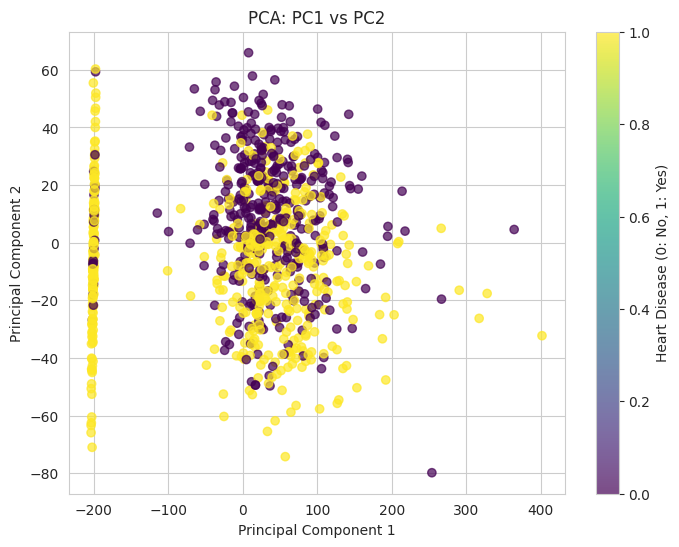

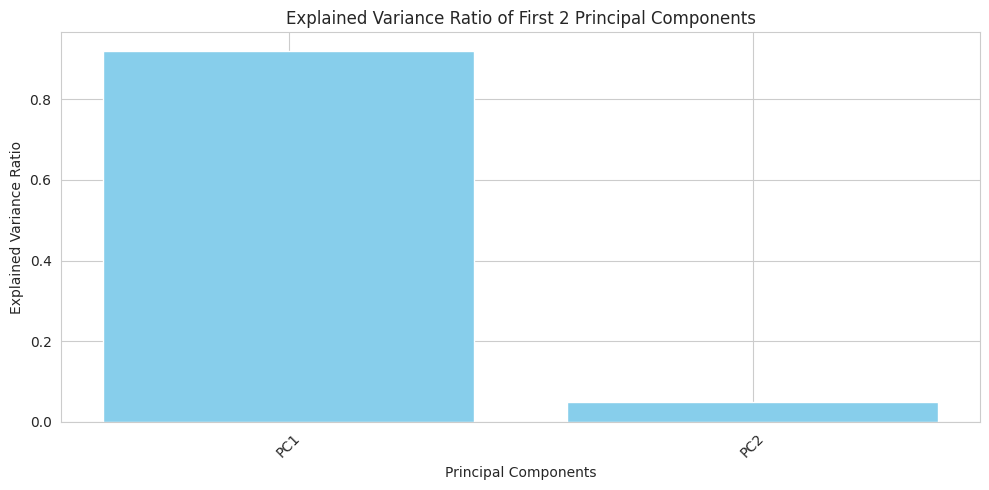

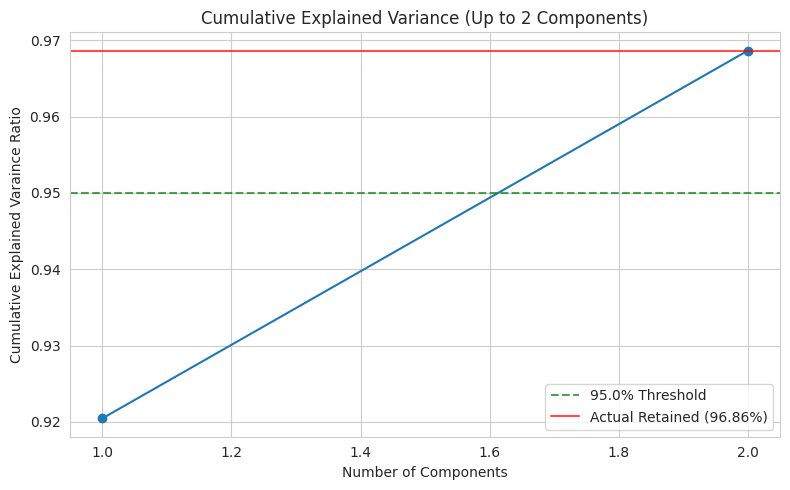

In [24]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA: PC1 vs PC2")
plt.colorbar(scatter, label="Heart Disease (0: No, 1: Yes)")
plt.grid(True)
plt.show()

if chosen_n_components >= 3:
    plt.figure(figsize(8,6))
    scatter = plt.scatter(X_pca_df['PC1'], X_pca_df['PC3'], c=y, cmap="viridis", alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 3")
    plt.title("PCA: PC! vs PC3")
    plt.colorbar(scatter, label="Heart Disease (0: No, 1: Yes)")
    plt.grid(True)
    plt.show()
    
    
plt.figure(figsize=(10,5))
plt.bar(pca_column_names, pca_chosen.explained_variance_ratio_, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel("Explained Variance Ratio")
plt.title(f"Explained Variance Ratio of First {chosen_n_components} Principal Components")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(1, chosen_n_components + 1), np.cumsum(pca_chosen.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Varaince Ratio")
plt.title(f"Cumulative Explained Variance (Up to {chosen_n_components} Components)")
plt.axhline(y=threshold_95, color='g', linestyle='--', alpha=0.7, label=f"{threshold_95*100}% Threshold")
plt.axhline(y=total_variance_retained, color='r', linestyle='-', alpha=0.7, label=f"Actual Retained ({total_variance_retained*100:.2f}%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Save PCA-Transformed Data:

In [25]:
X_pca_df.to_csv('../data/X_pca_transformed.csv', index=False)
print("\nPCA-transformed features saved to ../data/X_pca_transformed.csv")


import joblib
joblib.dump(pca_chosen, '../models/pca_model.pkl')
print("Fitted PCA object saved to ../models/pca_model.pkl")


PCA-transformed features saved to ../data/X_pca_transformed.csv
Fitted PCA object saved to ../models/pca_model.pkl
